## Example 3:Neural Networks with TensorFlow


### Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request

Of the three, the new requirement here is [OpenCV](https://opencv.org/). OpenCV is a package that is heavily used in industry: much of what we are about to implement is provided for you in OpenCV. So, if you were to want to perform any of these tasks beyond the scope of this course, it is very likely you will interact with this package. For the purposes of this project, however, we'll just be using its most basic functionality. Let's get started by loading in a sample image.

In [ ]:
url = "https://ewscripps.brightspotcdn.com/dims4/default/e666c4b/2147483647/strip/true/crop/1280x720+0+0/resize/1280x720!/quality/90/?url=https%3A%2F%2Fewscripps.brightspotcdn.com%2Fb0%2F82%2Fe97f14ff421ca8ca7d8692e0ecdb%2Fgeneric-1280-1.png"
urllib.request.urlretrieve(url, "bear.png")

('bear.png', <http.client.HTTPMessage at 0x78bc57f402b0>)

Now, let's load in the image and take a look at it:

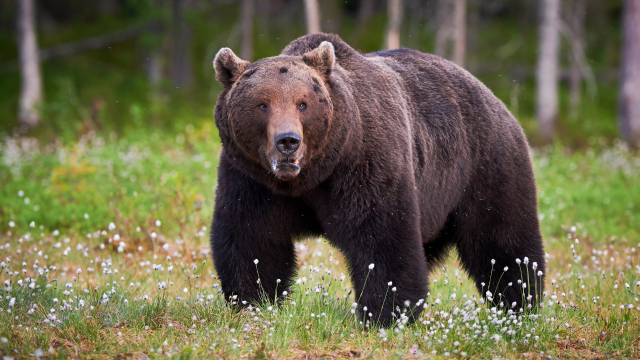

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread("bear.png")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
cv2_imshow(img)

One very important point is knowing *how* this image is represented. Let's take a look at that:

In [ ]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(360, 640, 3)


Turns out, images are nothing more than numpy arrays! This may seem a bit surprising if you've never seen it as such before, but in its simplest form, an image is nothing more than a matrix of pixel intensities, with each entry corresponding to the intensity of that particular point in the image. As a side note, when you display an image on your computer, the software you are using to render that image (whether it's Preview, Google Chrome, or Photoshop) just knows how to translate those numbers into paricular colors.

Returning to the color images, you can visualize these as internally being separated into three layers, which corresponds to the dimension we saw above of `(720, 1280, 3) = (height, width, depth)`, where depth is the number of color channels as expanded in the below image. In almost all cases, you will be dealing with color images (3 channels) or black-and-white images (1 channel). Be aware, however, that you may occasionally come across 4 channel images in practice, where the fourth channel stands for the transparency value of a pixel.

![](https://www.researchgate.net/profile/Konstantinos-Plataniotis/publication/253269938/figure/fig1/AS:298149273980930@1448095734706/Color-image-representation-in-the-RGB-color-domain.png)

### Question 1: Basic Image Processing [14 pts]
While you will not have to use OpenCV directly, you should know a couple basic things about interacting with images. You should be comfortable with the following tasks:
- Setting pixels in an image
- Iterating over pixels in images
Remember that images are *nothing* more than numpy arrays, so there is nothing different between iterating over arrays and iterating over pixels. But some practice will help solidify this.

For debugging purposes, it is best to remember the function `cv2_imshow()`. You pass into this function whatever image you want to render. Remember: rendering images is the equivalent of printing in normal programming! With that said, let's start on some basic image properties followed by some basic tasks:

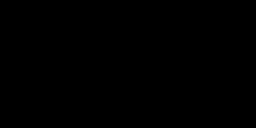

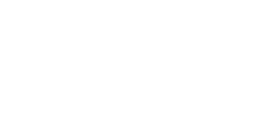

In [ ]:
test_img_black = np.zeros((128, 256, 1)) # 0 represents a black pixel in images
test_img_white = np.ones((128, 256, 1)) * 255 # 1 represents a white pixel in images

cv2_imshow(test_img_black)
cv2_imshow(test_img_white)

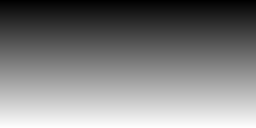

In [ ]:
# iterating over rows and columns is an indispensible tool for images
# sometimes it can be hard to keep track of which dimension is which, but just
# thinking through it slowly helps: the image dims are [height, width, depth]
# where "width" is the number of columns and "height" the number of rows

height, width, depth = test_img_black.shape
for row in range(height):
  # sets the row to a shade of gray: notice that, to index an image, you are
  # indexing image[row, column]
  test_img_black[row, :] = 2 * row
cv2_imshow(test_img_black)

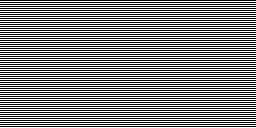

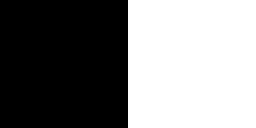

In [ ]:
test_img_black_and_white = np.zeros((128, 256, 1))
test_img_right_white = np.zeros((128, 256, 1))

#############################################################################
# [Task 1: 14 points]                                                        #
#                                                                           #
# 1) Modify the test_img_black_and_white variable above such that it has    #
# black and white pixels in alternating positions for *each* row [7 pt]     #
#                                                                           #
# 2) Modify the test_img_right_white variable above such that its right half#
# are white [7 pt]                                                          #
#############################################################################

# Replace "pass" statement with your code
test_img_black_and_white[1::2, :] = 255

half_width = test_img_right_white.shape[1] // 2
test_img_right_white[:, half_width:] = 255

cv2_imshow(test_img_black_and_white)
cv2_imshow(test_img_right_white)

### Question 2: Basic Edge Detection [21 pts]
Our task is to do edge detection on this particular image. Edge detection sounds simple in practice, but how do you actually make a computer "see" edges? This boils down to asking: what particular mathematical feature or property is distinctive about an edge?

Let's start by considering *only* vertical edges (that is, trying to find lines in the image that run up and down). These edges are characterized by the fact that, if you cross them, the color value dramatically changes. This is their key distinguishing feature! If you are "on" an object in an image, then moving left and right will not change the color much, since the color is likely fairly uniform across that object. However, if you move across an edge, you will "move onto" another object, during which the color will change.

We will see ways to improve both the speed and quality of the results, but this will serve as a jumping off point. For simplicity, we will just use a black and white image. To do this task, you should use the following algorithm:

- For each pixel `(x, y)`, determine if the change of the pixel from `(x-1, y)` to `(x+1,y)` is above some threshold `t` you choose. If it is, mark the pixel as an edge pixel, otherwise don't. Visualize edge pixels as white in the result and non-edges as black. Ignore pixels at the boundary of the image (where `x-1` and `x+1` are not defined)

With this very primitive algorithm, you should get a super noisy version of a vertical edge detector. Don't worry if it runs very slowly or does not produce clean results: we will work on improving this in the coming sections.

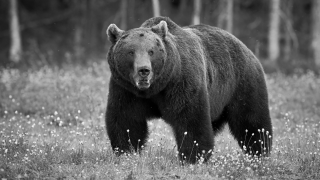

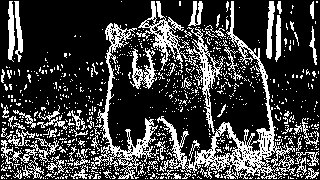

In [ ]:
bear = cv2.imread("bear.png")
bear = cv2.resize(img, None, fx=0.5, fy=0.5)

bw_bear = cv2.cvtColor(bear, cv2.COLOR_BGR2GRAY)
bear_edges = np.zeros(bw_bear.shape)

#############################################################################
# [Task 2: 21 points]                                                        #
# Implement basic edge detection on the bw_bear image, using the algorithm  #
# described above. The result will be very noisy and likely run slowly.     #
# Visualize edges with white pixels in the bw_bear image. You will need to  #
# figure out an appropriate choice of the threshold to get a reasonable img.#
#############################################################################
t = 20
for y in range(1, bw_bear.shape[0] - 1):
    for x in range(1, bw_bear.shape[1] - 1):
        diff = abs(int(bw_bear[y, x+1]) - int(bw_bear[y, x-1]))
        if diff > t:
            bear_edges[y, x] = 255

cv2_imshow(bw_bear)
cv2_imshow(bear_edges)

### Question 3: Convolutions [35 pts]
Now we get to how to improve this admittedly rudimentary edge detector. The core part of this improvement is the convolution operator. A convolution is nothing more than a weighted sum of pixels in an image. There is a more complicated mathematical genearalization of this operation, which we will need for the deep learning tie-in later. A convolution is characterized by what is called its "kernel", which is basically the weights associated with the sliding window. In the animation below, the light blue block is the original image, and the highlighted dark blue region the kernel that multiplies the subimage to produce the resulting convolved image.

![](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Kernels can be 1D vectors (just a row) or can be full matrices as shown in this animation. One key thing to see is that what we calculated above with the edge detector can actually be imagined as a convolution with a kernel with weights `[-1 0 1]`! It turns out that convolutions are *extremely* useful for dealing with images, so let's go ahead and implement it.

One detail with the convolution is figuring out what to do around the border of the image, since you will lose `k_w - 2` pixels when you do the convolution, where `k_w` is the kernel width (since the kernel will "hit" the image walls). The two primary options are to (1) pad the original image to compensate for what we would have otherwise lost or to (2) just convolve the image accepting that the result will be smaller. We will just do the latter for now, so your resulting image will be of smaller size than the input.

The goal is to implement 1D and 2D convolutions below. For 1D convolution, the pseudocode of the algorithm looks like this:

```
# assume that 1D convolutions are row-wise convolution
def conv1d(img, kernel):
    convolved_result = []
    go through each row of img:
      go through each pixel in the row:
        add the kernel convolved with the chunk next to the current pixel to result
      add np.array(convolved_row) to convolved_result
    return np.array(convolved_result)
```

In the case of 2D convolutions, you should expect to do roughly the same, with the difference being that the convolving step will involve both the row and column around the current pixel. Your hand crafted implementation of the result should match those results given by the library implementation:

In [ ]:
import scipy
from scipy import signal
random_img = np.random.random((128, 256)) * 255

#############################################################################
# [Task 3: 35 points]                                                        #
# Implement 1D and 2D convolutions from scratch. You should NOT do any      #
# padding and simply return an image that is smaller than the original by   #
# the appropriate amount. You can work with vanilla Python lists and simply #
# convert them to Numpy at the end for simplicity                           #
#                                                                           #
# 1) Implement conv1D below. The particulars of how this works is described #
# in the section above. Your results should match the results returned by   #
# the library implementation [14 pts]                                        #
#                                                                           #
# 2) Similarly implement conv2d. Extend the notions introduced in the 1D    #
# case to here [21 pt]                                                       #
#############################################################################

def conv1D(img, kernel):
  kernel_size = len(kernel)
  convolved_result = []

  for row in img:
        convolved_row = []
        for i in range(len(row) - kernel_size + 1):
            convolved_value = np.sum(row[i:i+kernel_size] * kernel)
            convolved_row.append(convolved_value)
        convolved_result.append(convolved_row)

  return np.array(convolved_result)

def conv2D(img, kernel):
  kernel_size = kernel.shape[0]
  convolved_result = []

  for i in range(img.shape[0] - kernel_size + 1):
        convolved_row = []
        for j in range(img.shape[1] - kernel_size + 1):
            submatrix = img[i:i+kernel_size, j:j+kernel_size]
            convolved_value = np.sum(submatrix * kernel)
            convolved_row.append(convolved_value)
        convolved_result.append(convolved_row)

  return np.array(convolved_result)

kernel1D = np.array([-1, 0, 3])
kernel2D = np.array(
    [np.array([-1, 1, -1]),
    np.array([1, 0, 1]),
    np.array([-1, 1, -1]),
])

convolved1D_pred = conv1D(random_img, kernel1D)
convolved1D_truth = scipy.signal.convolve2d(random_img, kernel1D[::-1].reshape(1, 3), mode='valid')

convolved2D_pred = conv2D(random_img, kernel2D)
convolved2D_truth = scipy.signal.convolve2d(random_img, np.flipud(np.fliplr(kernel2D)), mode='valid')

print(np.isclose(convolved1D_pred, convolved1D_truth, atol=1e-04).all())
print(np.isclose(convolved2D_pred, convolved2D_truth, atol=1e-04).all())

True
True


### Question 4: Blurring [15 pts]
As mentioned, the edge detector you have above can implemented with a convolution. However, there are many other operations as well that can be implemented as such. One of these, somewhat surprisingly at first, is image blurring. This comes down to the question: what is blurring at its core?

In reality, blurring is nothing more than a pixel being a weighted sum of its neighbors and itself (with lesser weight place as you get further away). This weighted sum has the same effect as "smudging" the pixels on screen. And this means that a blur is nothing more than a 2D convolution! So, the question simply boils down to: what kernel should we choose?

There is no single kernel that is necessarily the best for blurring, but the one that is most often used is a Gaussian blur kernel, which has elements:

$$
\frac{1}{16}
\begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Larger kernels can be used for "more blurring." For a 5x5 blur, you would use:

$$
\frac{1}{273}
\begin{pmatrix}
1 & 4 & 7 & 4 & 1 \\
4 & 16 & 26 & 16 & 4 \\
7 & 26 & 41 & 26 & 7 \\
4 & 16 & 26 & 16 & 4 \\
1 & 4 & 7 & 4 & 1
\end{pmatrix}
$$

Using these matrices and your `conv2D` implementation from above, perform two blurs on the bear image below:

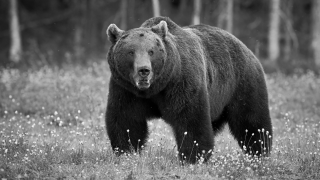

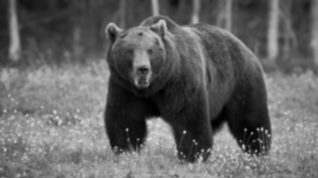

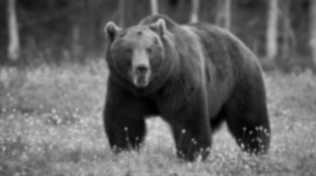

In [ ]:
bear = cv2.imread("bear.png")
bear = cv2.resize(img, None, fx=0.5, fy=0.5)

bw_bear = cv2.cvtColor(bear, cv2.COLOR_BGR2GRAY)
small_blurred_bw_bear = bw_bear.copy()
large_blurred_bw_bear = bw_bear.copy()

#############################################################################
# [Task 4: 15 points]                                                        #
# Using the 3x3 and 5x5 kernels described above and your conv2D function,   #
# run two blurs with Gaussian kernels on the bw_bear image. Store your      #
# results into small_blurred_bw_bear and large_blurred_bw_bear respectively,#
# such that they are visualized below [2 pts]                               #
#############################################################################

kernel_3x3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

kernel_5x5 = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
]) / 273

def apply_blur(bw_img, kernel):
    result_height = bw_img.shape[0] - kernel.shape[0] + 1
    result_width = bw_img.shape[1] - kernel.shape[1] + 1
    blurred_img = conv2D(bw_img, kernel)
    return blurred_img[:result_height, :result_width]

small_blurred_bw_bear = apply_blur(bw_bear, kernel_3x3)
large_blurred_bw_bear = apply_blur(bw_bear, kernel_5x5)

cv2_imshow(bw_bear)
cv2_imshow(small_blurred_bw_bear)
cv2_imshow(large_blurred_bw_bear)

### Question 5: Improved Edge Detection [15 pts]
Finally, we get to improving your basic edge detector! One thing to keep in mind is the algorithm for edge detection relies on differences in pixel values. However, you may have been thinking: an object can have small variations across its surface that also would be picked up by that algorithm even though these are not true "edges." So, to counter this finding of spurious edges, we start by blurring the image and then running the edge detection algorithm.

This time, you should implement the edge detector using a convolution. We will still just be looking for vertical edges, so you can simply convolve the image with `[-1, 0, 1]`. Remember that you still have to check if that convolved image exceeds the threshold, although your threshold may be different than before.

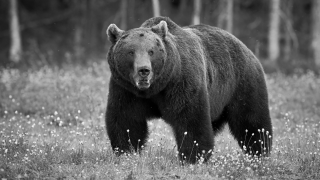

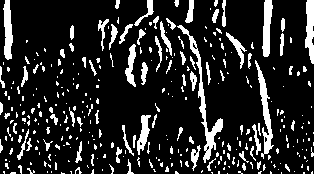

In [ ]:
bear = cv2.imread("bear.png")
bear = cv2.resize(img, None, fx=0.5, fy=0.5)

bw_bear = cv2.cvtColor(bear, cv2.COLOR_BGR2GRAY)
bw_bear_edges = bw_bear.copy()

#############################################################################
# [Task 5: 15 points]                                                        #
# Implement an improved edge detector, using convolutions for both doing    #
# blurring and edge detection. You must check the convolved image to figure #
# out whether a particular pixel represents an edge or not. Hint: there     #
# a clean way of doing this using broadcasting. Use your implementation     #
# of the convolution functions. Store your result into bw_bear_edges        #
#############################################################################

gaussian_kernel = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
]) / 273
edge_detection_kernel = np.array([-1, 0, 1])

blurred_bw_bear = conv2D(bw_bear, gaussian_kernel)

edges_convolved = conv2D(blurred_bw_bear, edge_detection_kernel)

threshold = np.max(edges_convolved) * 0.1
bw_bear_edges = np.where(edges_convolved > threshold, 255, 0).astype(np.uint8)


cv2_imshow(bw_bear)
cv2_imshow(bw_bear_edges)